#  Retinal OCT Images (optical coherence tomography)


# Description

 - The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).



# Problem Statement 

- Detect Retina Damage From OCT Images

# Constraints 

 - False Negative , is the biggest constraint for any medical based ML & DL based problems, we need to minimize this.
 - Latancy is not the problem as tradition approches takes weeks.

# Benifits

 - Predicting damage in eyes without using tradition or having domain expertise

![title](https://i.imgur.com/fSTeZMd.png)


In [1]:
#Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
from keras.preprocessing.image import ImageDataGenerator  
# Generate batches of tensor image data with real-time data augmentation.



Using TensorFlow backend.


#  Creating directory for train and validation

In [3]:
# Let's use some data augmentaiton 
BATCH_SIZE = 16                          #Batch size
IMG_SIZE = (160, 160)                   # Image Size
train_dir = './train'               # Train data location
test_data_dir = './test'            # Test data location



train_dataset = image_dataset_from_directory(train_dir,           # Train
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,)



validation_dataset = image_dataset_from_directory(test_data_dir,    # Validation
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)




Found 8000 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


![Data Augumentation](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/12/Image-Augmentation.jpg)





# Data Augumentation 
- rescaling , rotation , width & height  shift  and performing shear

In [4]:


from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator         #importing Image Data Generator

TRAINING_DIR = './train'


#Doing Image Augumentation 
training_datagen = ImageDataGenerator(            
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = './test'                  
validation_datagen = ImageDataGenerator(rescale = 1./255)      # Image Augmentation for Validation data




# Passing the images from datagenerator



In [5]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

# Passing Validation data in datagenator
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 8000 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


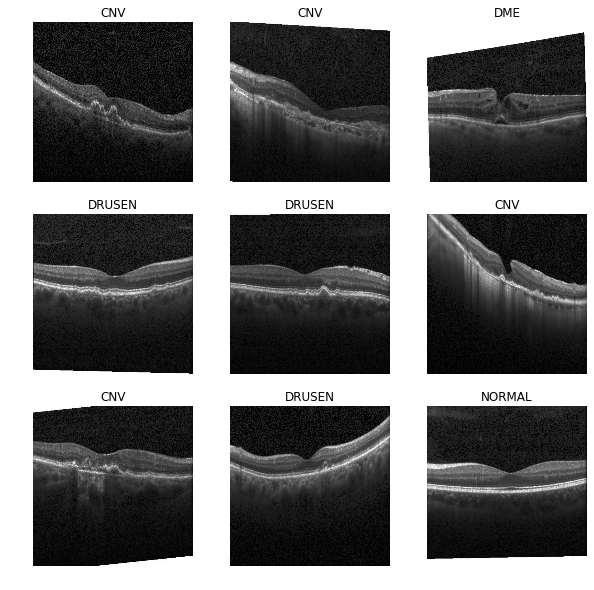

In [6]:
# Ploting  Diffrent Images
class_names = train_dataset.class_names 
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1): 
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)   
        plt.imshow(images[i].numpy().astype("uint8"))   
        plt.title(class_names[labels[i]])  
        plt.axis("off")



# Creating Model

In [15]:



model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    
    
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.summary()

# Early stoping to stop when acc and loss dont converge

#earlystoping=tf.keras.callbacks.EarlyStopping(
 #   monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
  #  baseline=None, restore_best_weights=False)


model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=40, steps_per_epoch=10,
                    validation_data = validation_generator, verbose = 1, validation_steps=3,)
                    #callbacks=[earlystoping] )







Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 128)      

Epoch 39/40
10/10 [==============================] - 87s 9s/step - loss: 0.8560 - accuracy: 0.6008 - val_loss: 0.6940 - val_accuracy: 0.6958
Epoch 40/40
10/10 [==============================] - 89s 9s/step - loss: 0.9190 - accuracy: 0.5627 - val_loss: 0.9939 - val_accuracy: 0.5185


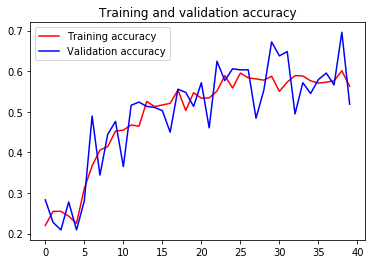

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Conclusive 
- As the dataset is small , using vanilla CNN is giving good accuracy 


# Future Scope 
- As the cost of misclassification is very high , improving model is must, One can use tranfer learning